# Exploratory Data Analysis (EDA)

In [ ]:
import sys, importlib
sys.path.append(r"\02-Functions")
import Functions_Download, Functions_Processing, Functions_Plot
importlib.reload(Functions_Download, Functions_Processing, Functions_Plot)

## Import Data

In [11]:
# Read Cotation
df_cotation = read_split_excel("00-Data/Transform_files", "cotation_final")
# Read index
df_index = read_split_excel("00-Data/Transform_files", "indice_final")
# Read Dividend
df_div = read_split_excel("00-Data", "Div_2022")

Loading single file: cotation_final.xlsx
Loading single file: indice_final.xlsx
Loading single file: Div_2022.xlsx


## Data Processing

### Cleaning Data

In [12]:
print('Shape of Cotation data',df_cotation.shape)
print('Shape of Index data',df_index.shape)
print('Shape of Dividend data',df_div.shape)

Shape of Cotation data (65390, 11)
Shape of Index data (10640, 8)
Shape of Dividend data (62, 3)


In [13]:
df_cotation.dtypes

CAPITAUX             float64
CLOTURE              float64
CODE_VAL              object
C_GR_RLC               int64
LIB_VAL               object
NB_TRAN                int64
OUVERTURE            float64
PLUS_BAS             float64
PLUS_HAUT            float64
QUANTITE_NEGOCIEE      int64
SEANCE                object
dtype: object

In [14]:
df_index.dtypes

CODE_INDICE           int64
INDICE_JOUR         float64
INDICE_PLUS_BAS     float64
INDICE_PLUS_HAUT    float64
INDICE_VEILLE       float64
LIB_INDICE           object
SEANCE               object
VARIATION_VEILLE    float64
dtype: object

In [15]:
df_div.dtypes

LIB_VAL            object
Div               float64
Date       datetime64[ns]
dtype: object

In [16]:
# Convert date column
df_cotation['SEANCE'] = pd.to_datetime(df_cotation['SEANCE'] , dayfirst=True, 
                                       errors="coerce") 
df_index['SEANCE'] = pd.to_datetime(df_index['SEANCE'] , dayfirst=True, 
                                    errors="coerce") 

In [17]:
df_cotation.dtypes

CAPITAUX                    float64
CLOTURE                     float64
CODE_VAL                     object
C_GR_RLC                      int64
LIB_VAL                      object
NB_TRAN                       int64
OUVERTURE                   float64
PLUS_BAS                    float64
PLUS_HAUT                   float64
QUANTITE_NEGOCIEE             int64
SEANCE               datetime64[ns]
dtype: object

In [18]:
df_index.dtypes

CODE_INDICE                  int64
INDICE_JOUR                float64
INDICE_PLUS_BAS            float64
INDICE_PLUS_HAUT           float64
INDICE_VEILLE              float64
LIB_INDICE                  object
SEANCE              datetime64[ns]
VARIATION_VEILLE           float64
dtype: object

In [19]:
df_cotation['LIB_VAL'].unique()

array(['SFBT', 'ATTIJARI BANK', 'BIAT', 'BH BANK', 'BT', 'STB', 'BNA',
       'ICF', 'AMEN BANK', 'ATB', 'UIB', 'ATL', 'POULINA GP HOLDING',
       'SOTETEL', 'SOTUVER', 'SOTUMAG', 'SIAME', 'ATTIJARI LEASING',
       'SOTRAPIL', 'SOMOCER', 'ADWYA', 'TPR', 'SOPAT', 'ARTES',
       'CARTHAGE CEMENT', 'ENNAKL AUTOMOBILES', 'TELNET HOLDING',
       'LAND OR', 'ONE TECH HOLDING', 'NEW BODY LINE', 'CITY CARS',
       'EURO-CYCLES', 'SAH', 'MPBS', 'SOTIPAPIER', 'DELICE HOLDING',
       'UNIMED', 'ATELIER MEUBLE INT', 'SMART TUNISIE', 'MONOPRIX',
       'BTE (ADP)', 'SPDIT - SICAF', 'TUNISIE LEASING F',
       'AIR LIQUIDE TSIE', 'UBCI', 'PLAC. TSIE-SICAF', 'ASTREE', 'SIMPAR',
       'TUNINVEST-SICAR', 'CIL', 'STIP', 'STAR', 'MAGASIN GENERAL',
       'BH ASSURANCE', 'BH LEASING', 'SITS', 'WIFACK INT BANK',
       'ESSOUKNA', 'HANNIBAL LEASE', 'CIMENTS DE BIZERTE', 'TUNIS RE',
       'BEST LEASE', 'SOTEMAIL', 'CEREALIS', 'OFFICEPLAST',
       'ASSUR MAGHREBIA', 'SITEX', 'STE TUN. DU SUCRE',
   

In [20]:
df_div['LIB_VAL'].unique()

array(['ATL', 'ASSURANCES MAGHREBIA', 'ASSURANCES MAGHREBIA VIE',
       'ATTIJARI BANK', 'BH ASSURANCE', 'BT', 'BIAT', 'BNA', 'CITY CARS',
       'ENNAKL AUTOMOBILES', 'HANNIBAL LEASE', 'MPBS', 'ONE TECH HOLDING',
       'SAH', 'SFBT', 'DELICE HOLDING', 'SOTUVER', 'SOTIPAPIER', 'TPR',
       'SMART TUNISIE', 'STA'], dtype=object)

### Stat Des

In [21]:
summary_table(df_cotation)

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,missing,unique,dtype
variable,,,,,,,,,,,,,
CAPITAUX,65390,72787.828142,1160614.474309,0.0,0.0,1796.415,22688.16,169677302.14,78.504018,8815.697935,0,39356,float64
CLOTURE,65390,14.432571,23.723607,0.08,2.4825,6.2,13.43,185.0,3.454169,14.42184,0,4007,float64
CODE_VAL,65390,-,-,-,-,-,-,-,-,-,0,89,object
C_GR_RLC,65390,26.406163,31.968662,11,11.0,12.0,12.0,99,1.791208,1.290753,0,5,int64
LIB_VAL,65390,-,-,-,-,-,-,-,-,-,0,90,object
NB_TRAN,65390,14.595565,29.743604,0,0.0,4.0,17.0,757,5.697665,57.736648,0,345,int64
OUVERTURE,65390,14.427388,23.711474,0.08,2.49,6.2,13.41,185.0,3.453473,14.416579,0,4010,float64
PLUS_BAS,65390,9.185377,20.006669,0.0,0.0,3.05,8.52,185.0,4.336942,22.542827,0,3892,float64
PLUS_HAUT,65390,9.281459,20.154102,0.0,0.0,3.1,8.64,188.0,4.311635,22.224309,0,3869,float64


In [22]:
summary_table(df_index)

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,missing,unique,dtype
variable,,,,,,,,,,,,,
CODE_INDICE,10640,905011.357143,7.751928,905001,905004.0,905011.0,905017.0,905028,0.40815,-0.730918,0,14,int64
INDICE_JOUR,10640,5686.023651,3514.389032,533.59,2924.252,4736.508,8127.275,15212.527,0.607791,-0.362715,0,10503,float64
INDICE_PLUS_BAS,10640,5158.802175,3188.671248,533.59,2820.711,4312.63,6960.3,13901.307,0.666907,-0.181061,0,567,float64
INDICE_PLUS_HAUT,10640,5875.855716,3632.652518,563.22,2996.12,4843.036,8351.17,15212.527,0.593957,-0.462905,0,1253,float64
INDICE_VEILLE,10640,6354.509782,22536.166495,533.59,2925.237,4741.3715,8132.4545,1216805.0,39.544094,1792.980866,0,10502,float64
LIB_INDICE,10640,-,-,-,-,-,-,-,-,-,0,14,object
SEANCE,10640,-,-,2022-01-03 00:00:00,-,-,-,2024-12-31 00:00:00,-,-,0,760,datetime64[ns]
VARIATION_VEILLE,10640,-0.091414,3.645867,-99.01,-0.28725,0.0,0.332,4.638,-26.272143,710.152381,0,2661,float64


In [23]:
summary_table(df_div)

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,missing,unique,dtype
variable,,,,,,,,,,,,,
LIB_VAL,62,-,-,-,-,-,-,-,-,-,0,21,object
Div,62,1.176403,1.393092,0.175,0.3,0.625,1.25,6.0,2.105134,4.048776,0,44,float64
Date,62,-,-,2022-04-07 00:00:00,-,-,-,2024-07-26 00:00:00,-,-,0,55,datetime64[ns]


### Feature Ingeneering

In [24]:
# Convert prices into a pivot table
df_pivot = df_cotation.pivot_table(
    index="SEANCE",
    columns="LIB_VAL",
    values="CLOTURE"
).sort_index()

df_pivot_index_d = df_index.pivot_table(
    index="SEANCE",
    columns="LIB_INDICE",
    values="INDICE_JOUR"
).sort_index()
df_pivot_index_l = df_index.pivot_table(
    index="SEANCE",
    columns="LIB_INDICE",
    values="INDICE_PLUS_BAS"
).sort_index()
df_pivot_index_h = df_index.pivot_table(
    index="SEANCE",
    columns="LIB_INDICE",
    values="INDICE_PLUS_HAUT"
).sort_index()

df_pivot_div = df_div.pivot_table(
    index="Date",
    columns="LIB_VAL",
    values="Div"
).sort_index()

# Check
print("df_pivot size:", df_pivot.shape)       # (rows, columns)
print("df_pivot size:", df_pivot_index_d.shape)       # (rows, columns)
print("df_pivot_div size:", df_pivot_div.shape)

df_pivot size: (760, 90)
df_pivot size: (760, 14)
df_pivot_div size: (55, 21)


In [25]:
# Clean Data
df_pivot_index_d.columns = df_pivot_index_d.columns.str.strip()
df_pivot_index_l.columns = df_pivot_index_l.columns.str.strip()
df_pivot_index_h.columns = df_pivot_index_h.columns.str.strip()

In [26]:
# Ensure indexes are datetime
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot_div.index = pd.to_datetime(df_pivot_div.index)

# Reindex dividend dataframe to match price dataframe index (SEANCE)
df_div_aligned = df_pivot_div.reindex(df_pivot.index).fillna(0)

# Find missing columns
missing_cols = set(df_pivot.columns) - set(df_div_aligned.columns)

# Add missing columns with value 0
for col in missing_cols:
    df_div_aligned[col] = 0

# Reorder columns to match df_pivot
df_div_aligned = df_div_aligned[df_pivot.columns]

# Check
print("df_pivot size:", df_pivot.shape)       # (rows, columns)
print("df_pivot_div size:", df_div_aligned.shape)

df_pivot size: (760, 90)
df_pivot_div size: (760, 90)


In [27]:
# df_div_aligned: dividend DataFrame aligned to df_pivot
adje_coef = compute_adjustment_coefficient(df_pivot, df_div_aligned)

# Compute adjusted prices using the coefficients
df_price_adj = df_pivot * adje_coef


C:\Users\bilel\AppData\Local\Temp\ipykernel_8328\2666428919.py:250: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adje_coef[col].iloc[t] = (P_prev / (P_prev - D_curr)) * adje_coef[col].iloc[t-1]
C:\Users\bilel\AppData\Local\Temp\ipykernel_83

In [28]:
# Make sure your indexes are datetime
df_pivot.index = pd.to_datetime(df_pivot.index)
df_pivot_div.index = pd.to_datetime(df_pivot_div.index)

# Compute adjusted prices
df_price_adj = compute_adjusted_prices(df_pivot, df_pivot_div)


In [ ]:
save_dataframes_to_excel("03-Output/01-EDA/00-Data_use",
                         {"stock_price": df_pivot,
                          "index_d": df_pivot_index_d,
                          "index_l": df_pivot_index_l,
                          "index_h": df_pivot_index_h,
                          "stock_price_adj": df_price_adj})

Saved → 04-Output/02-EDA\stock_price.xlsx
Saved → 04-Output/02-EDA\index_d.xlsx
Saved → 04-Output/02-EDA\index_l.xlsx
Saved → 04-Output/02-EDA\index_h.xlsx
Saved → 04-Output/02-EDA\stock_price_adj.xlsx

Done. All DataFrames saved with index successfully.


## Indeces EDA

### Level

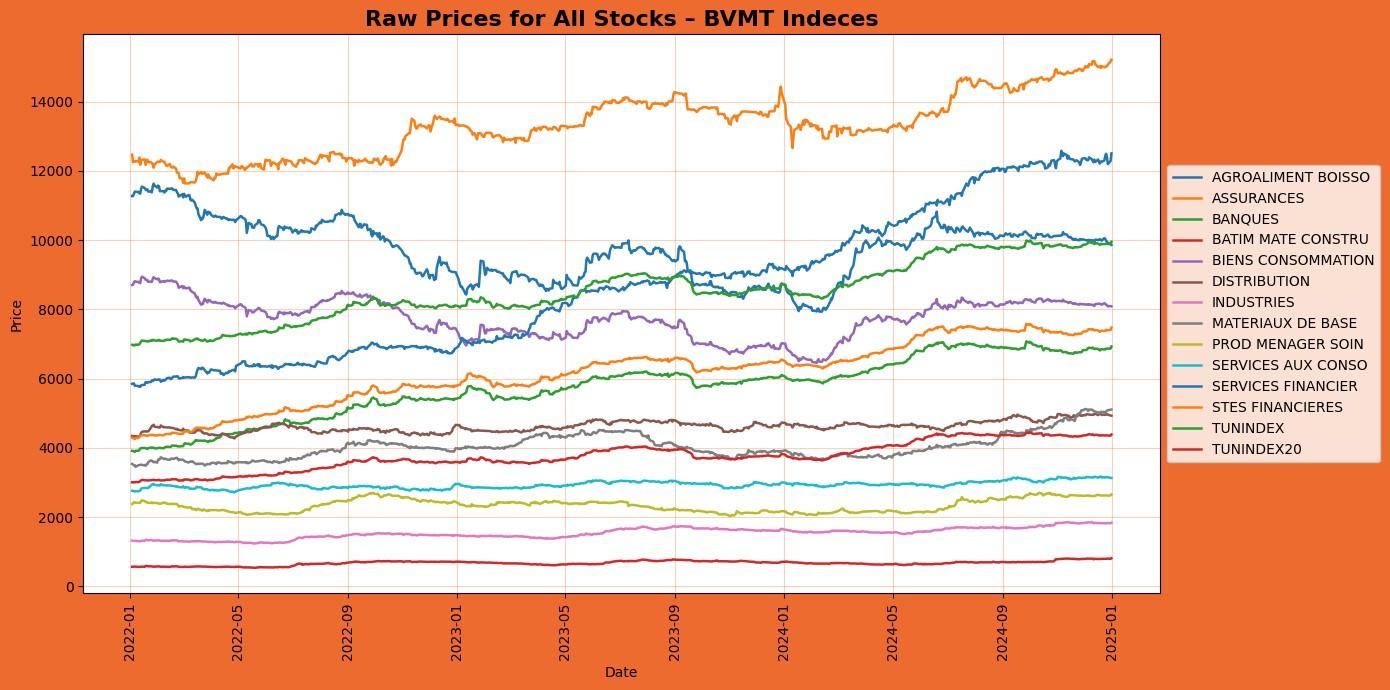

Saved: 03-Output/01-EDA/01-Indeces\BVMT Indeces.png


In [29]:
folder_path = "03-Output/01-EDA/01-Indeces"
plot_raw_all(df_pivot_index_d, folder_path, df_name="BVMT Indeces")

In [30]:
output_path = "03-Output/01-EDA/01-Indeces/01-Evolution"
save_raw_plots(df_pivot_index_d, output_path)

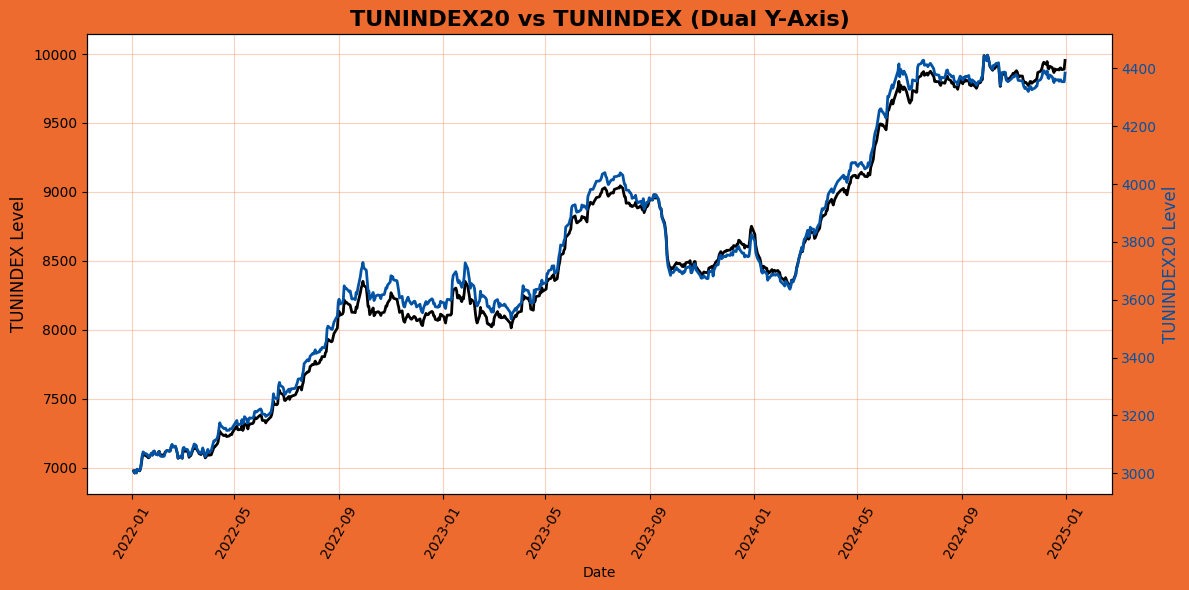

Plots saved in: 03-Output/01-EDA/01-Indeces/02-Comparative


In [31]:
output_path = "03-Output/01-EDA/01-Indeces/02-Comparative"
save_index_vs_tunindex(df_pivot_index_d, 
                       folder_path=output_path,
                       show_index="TUNINDEX20",
                       tunindex_col="TUNINDEX")

### Transform Log

In [32]:
return_index_d = compute_returns(df_pivot_index_d, 
                                 return_type="log", 
                                 freq="D",
                                 suffix="")

In [ ]:
save_dataframes_to_excel(
    "03-Output/01-EDA/01-Indeces",
    {
        "returns_indeces": return_index_d 
    }
)

Saved → 04-Output/02-EDA\returns_indeces.xlsx

Done. All DataFrames saved with index successfully.


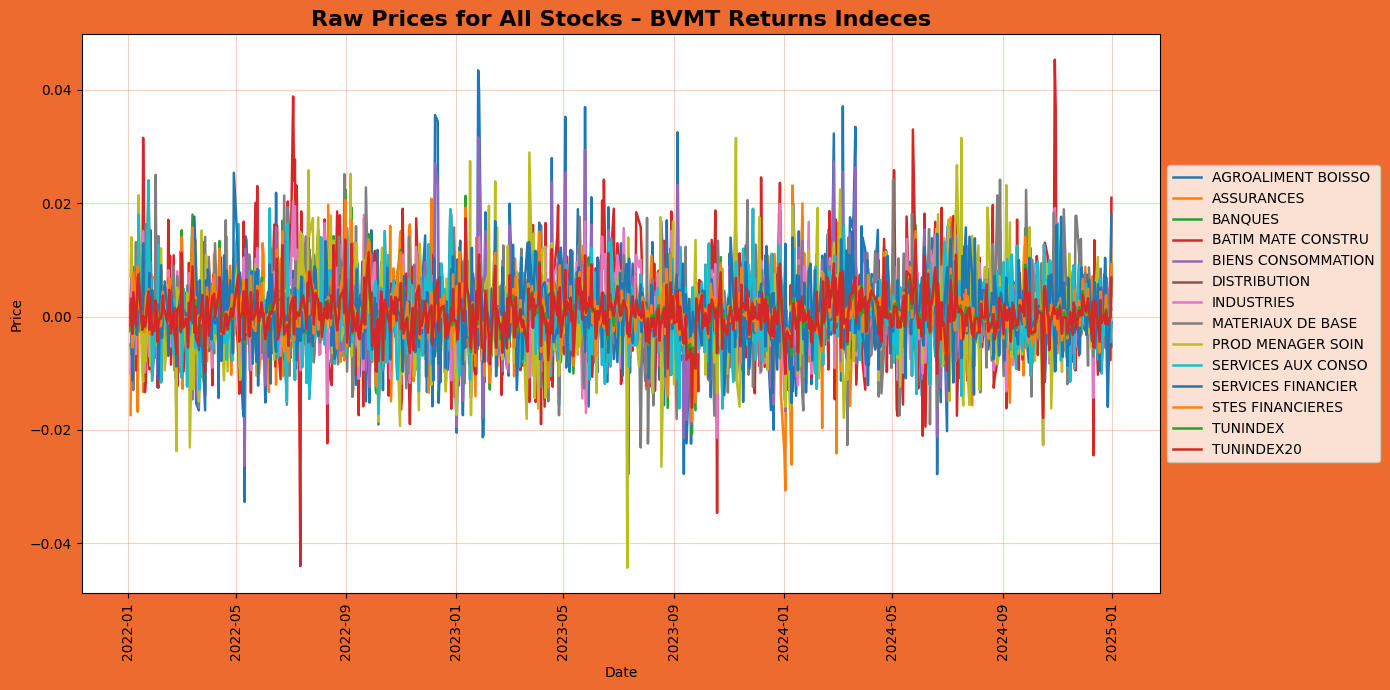

Saved: 04-Output/02-EDA/00-Indeces\BVMT Returns Indeces.png


In [ ]:
folder_path = "03-Output/01-EDA/01-Indeces"
plot_raw_all(return_index_d, folder_path, df_name="BVMT Returns Indeces")

In [169]:
return_index_d.columns

Index(['AGROALIMENT BOISSO', 'ASSURANCES', 'BANQUES', 'BATIM MATE CONSTRU',
       'BIENS CONSOMMATION', 'DISTRIBUTION', 'INDUSTRIES', 'MATERIAUX DE BASE',
       'PROD MENAGER SOIN', 'SERVICES AUX CONSO', 'SERVICES FINANCIER',
       'STES FINANCIERES', 'TUNINDEX', 'TUNINDEX20'],
      dtype='object')

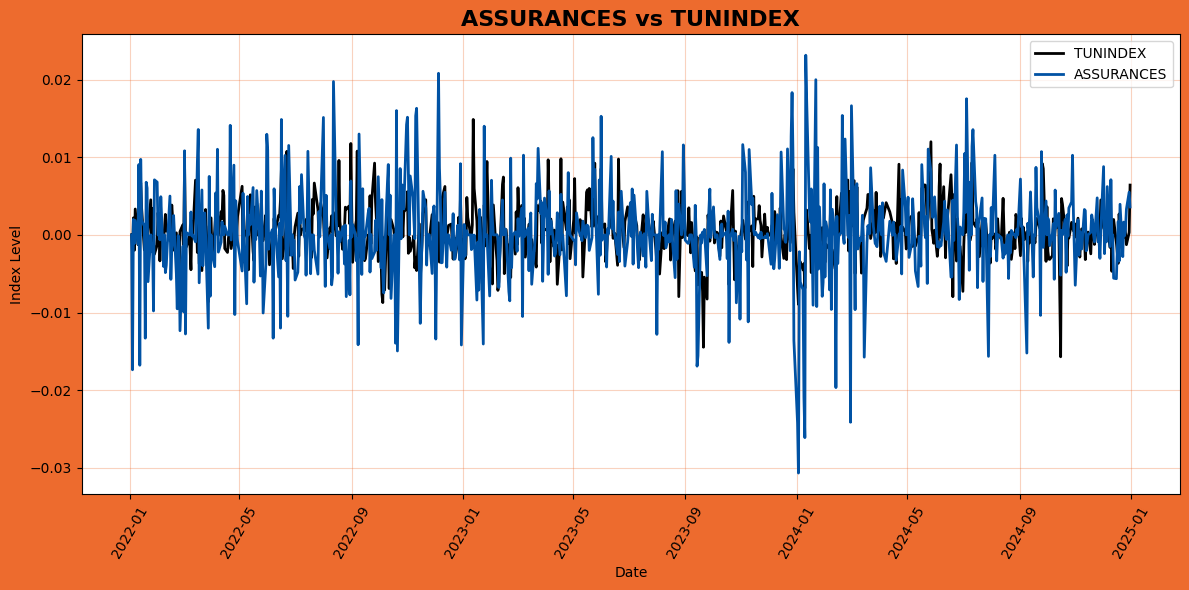

Plots saved in: 04-Output/02-EDA/00-Indeces/03-Returns


In [ ]:
output_path = "03-Output/01-EDA/01-Indeces/03-Returns"
save_returns_index_vs_tunindex(return_index_d, 
                               folder_path=output_path, 
                               tunindex_col="TUNINDEX", 
                               show_index="ASSURANCES")
    

In [258]:
cum_return_index_d = compute_cumulative_returns(return_index_d)

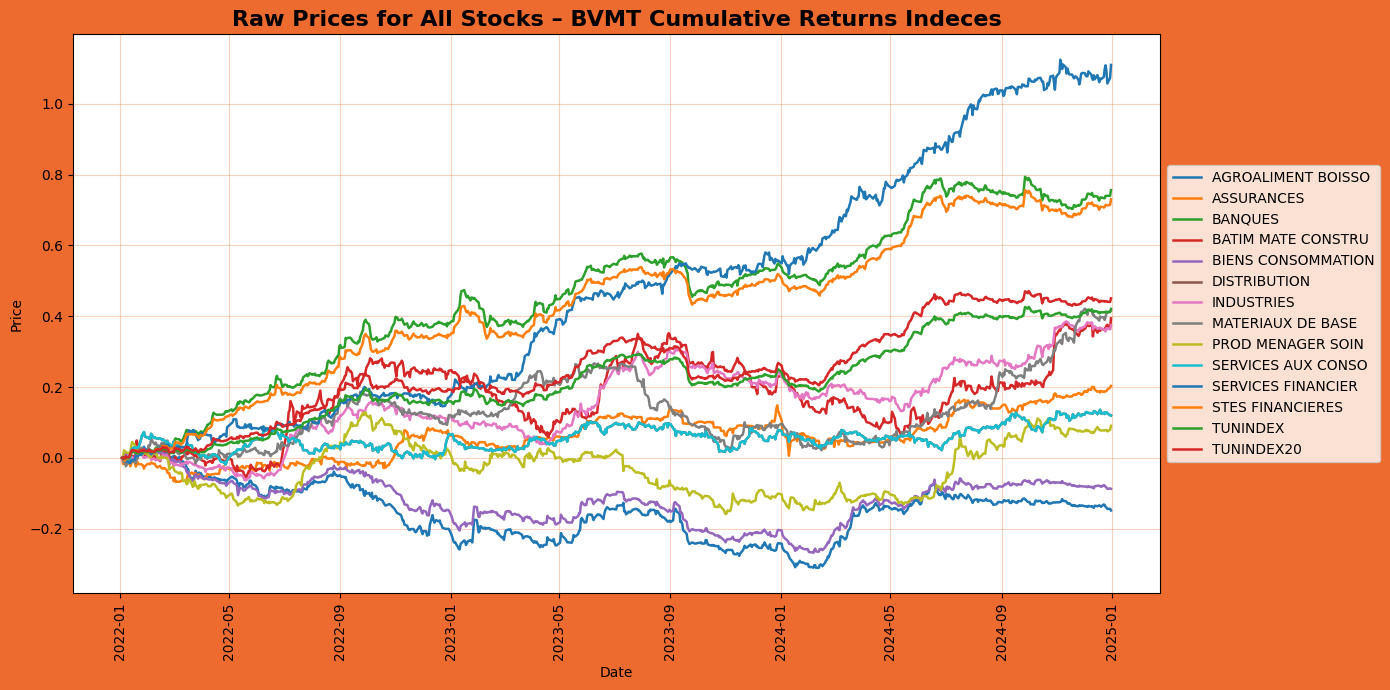

Saved: 04-Output/02-EDA/00-Indeces\BVMT Cumulative Returns Indeces.png


In [ ]:
folder_path = "03-Output/01-EDA/01-Indeces"
plot_raw_all(cum_return_index_d, folder_path, df_name="BVMT Cumulative Returns Indeces")

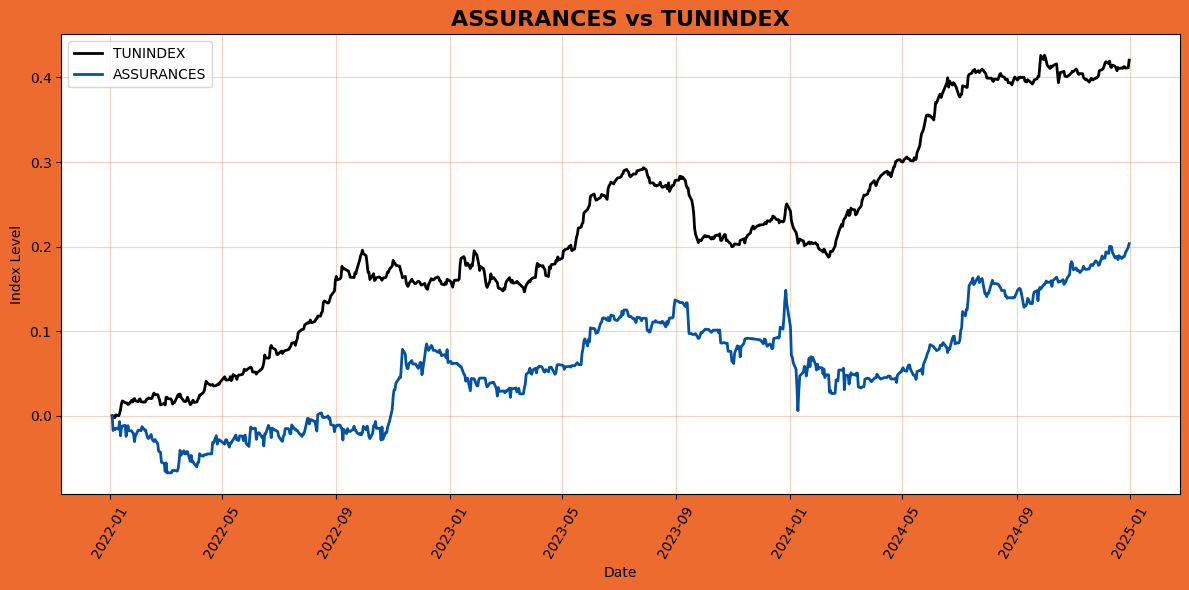

Plots saved in: 04-Output/02-EDA/00-Indeces/04-Cumulative Returns


In [ ]:
output_path = "03-Output/01-EDA/01-Indeces/04-Cumulative Returns"
save_returns_index_vs_tunindex(cum_return_index_d, 
                               folder_path=output_path, 
                               tunindex_col="TUNINDEX", 
                               show_index="ASSURANCES")
    

## Stock Price EDA

### Level

#### Difference between price and ajusted price

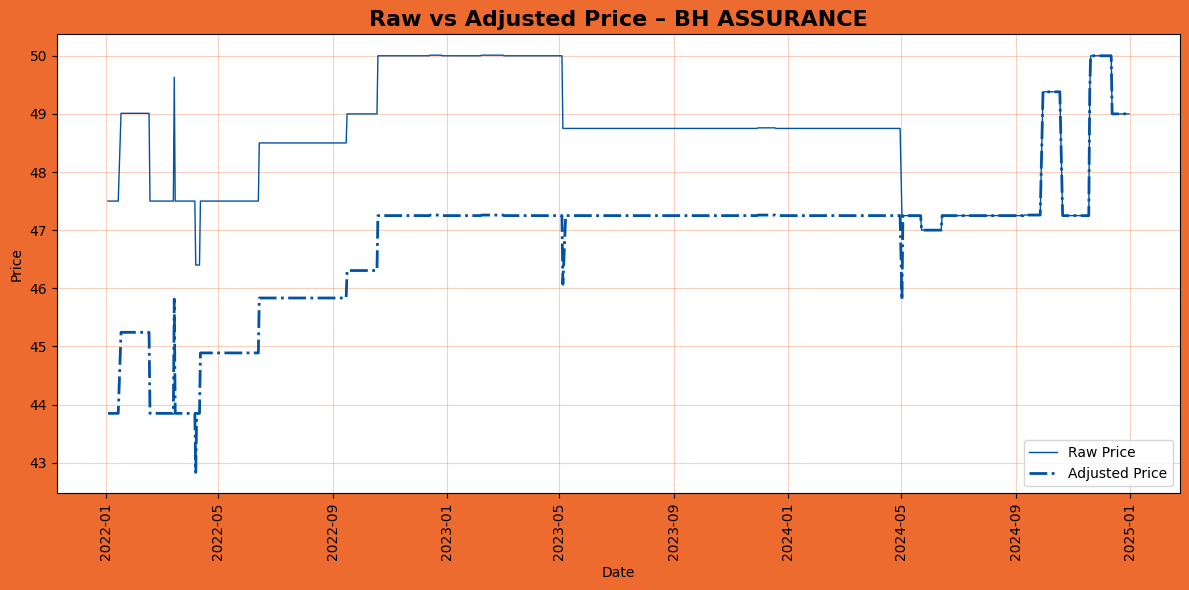

In [33]:
plot_raw_vs_adjusted(df_pivot, df_price_adj, "BH ASSURANCE")

In [34]:
output_path = "03-Output/01-EDA/02-Stock_Price/01-Evolution Adjusted"
save_raw_vs_adj_plots(df_pivot, df_price_adj, output_path)

#### Boxplot price

C:\Users\bilel\AppData\Local\Temp\ipykernel_8328\89502592.py:217: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(df_pivot[cols].values,


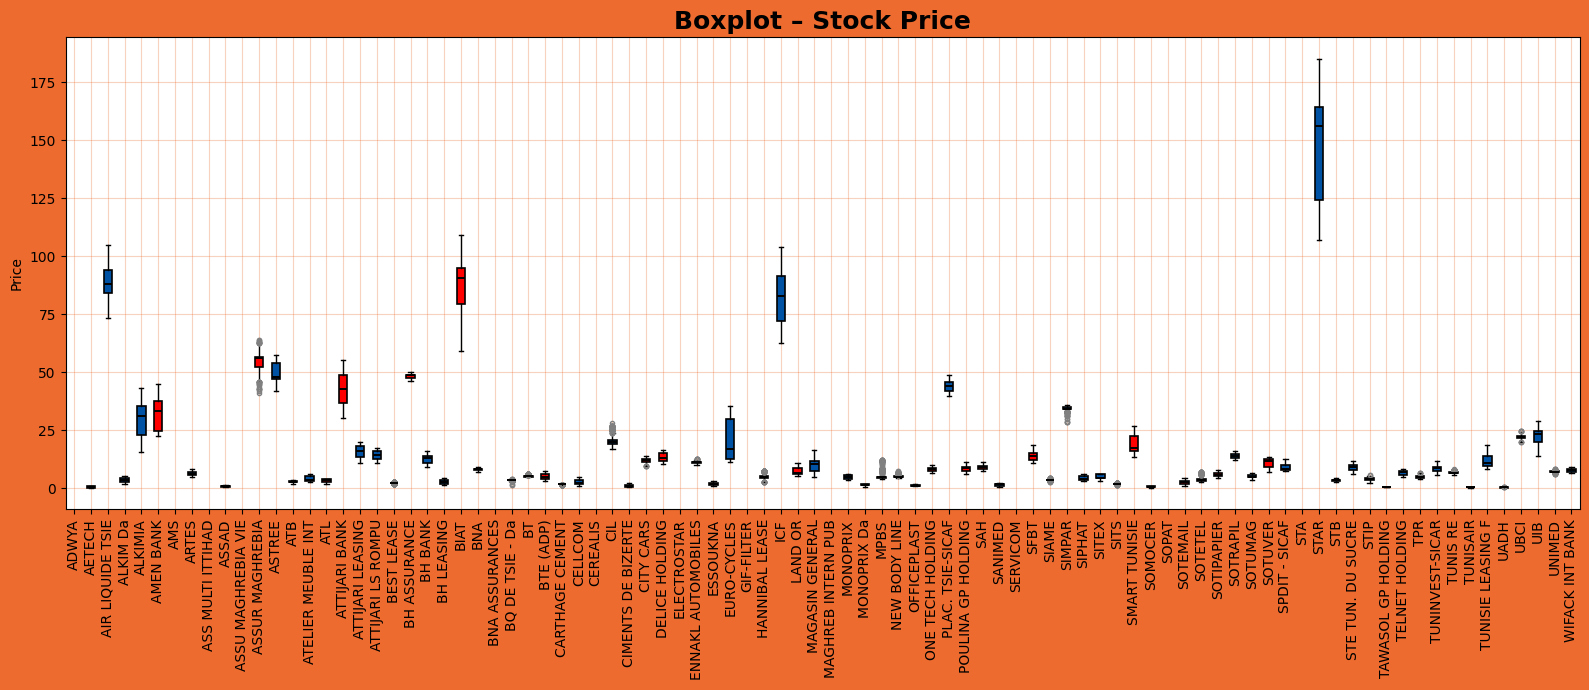

Saved: 03-Output/01-EDA/02-Stock_Price\Stock Price.png


In [35]:
output_path = "03-Output/01-EDA/02-Stock_Price"
plot_boxplot(
    df_pivot,
    folder_path=output_path,
    df_name="Stock Price",
    highlight_list=Actual_portfolio,
    highlight_color="red"
)

C:\Users\bilel\AppData\Local\Temp\ipykernel_8328\89502592.py:217: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(df_pivot[cols].values,


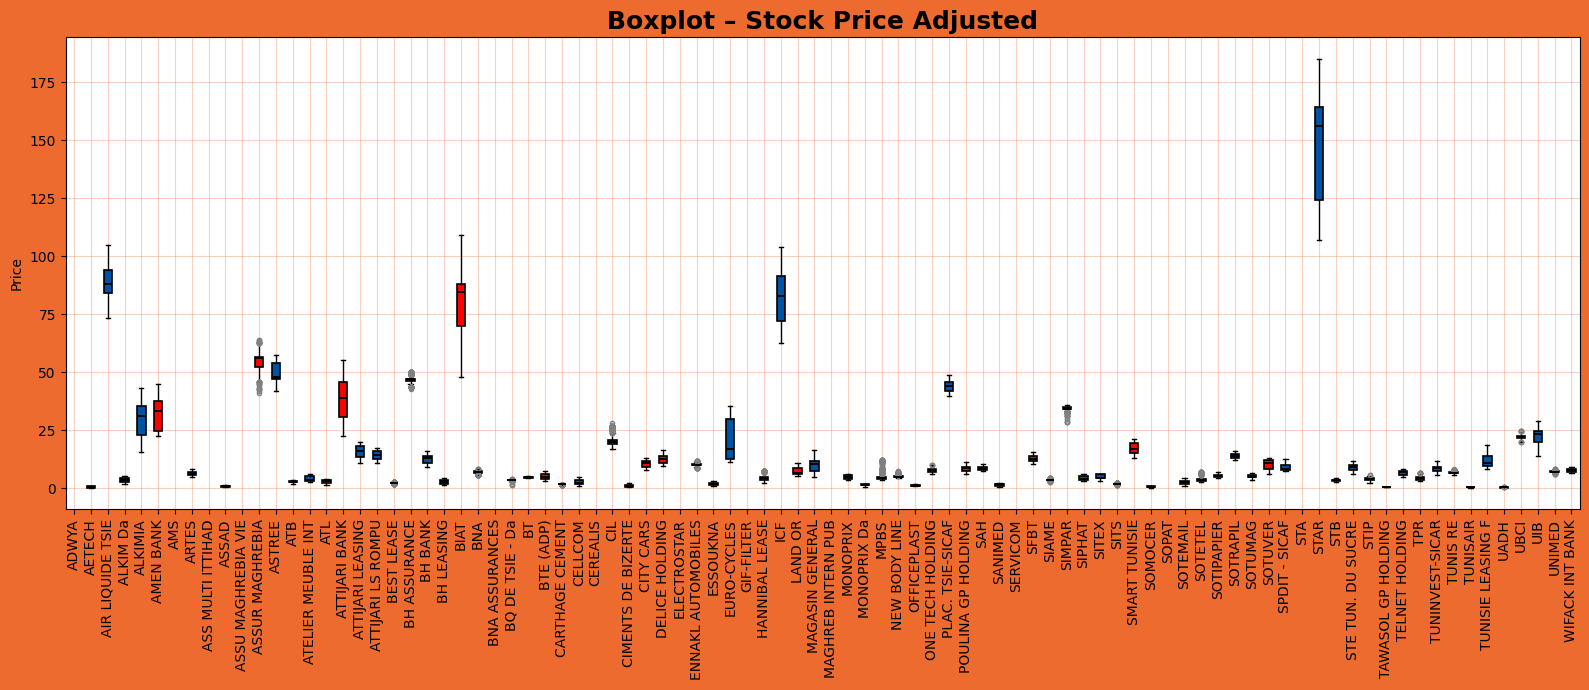

Saved: 03-Output/01-EDA/02-Stock_Price\Stock Price Adjusted.png


In [36]:
plot_boxplot(
    df_price_adj,
    folder_path=output_path,
    df_name="Stock Price Adjusted",
    highlight_list=Actual_portfolio,
    highlight_color="red"
)

#### Correlation Matrix

📌 Summary of Correlation Methods in Finance

| **Method** | **Available in Pandas** | **Captures**   | **Use Case** |
|--------------|---------------|------------|--------------------|
| **Pearson**             | ✔ Yes                  | Linear relationships       | Standard finance, covariance, clustering       |
| **Spearman**            | ✔ Yes                  | Monotonic relationships    | Handles outliers, rank-based analysis          |
| **Kendall**             | ✔ Yes                  | Ordinal association        | Robust small-sample statistics                 |
| **Rolling Correlation** | ✖ No                   | Time-varying correlation   | Regime changes, dynamic market behaviour       |
| **EWMA Correlation**    | ✖ No                   | Recently weighted effects  | RiskMetrics, VaR, volatility modelling         |
| **Distance Correlation**| ✖ No                   | Any non-linear dependence  | Detects arbitrary relationships (non-linear)   |
| **Mutual Information**  | ✖ No                   | Information dependency     | Machine learning, feature selection            |
| **Tail Correlation**    | ✖ No                   | Crash/extreme dependence   | Systemic risk, stress test, EVT               |


Financial-specific correlation measures (manual)
1) Rolling correlation : To smooth volatility
2) Exponentially Weighted Correlation (EWMA) : (used by RiskMetrics 1996, λ = 0.94)
3) Distance correlation (non-linear dependence) : Captures ANY dependence, not just monotonic or linear.
4) Mutual information matrix : Detects non-linear dependence.
5) Tail-dependent correlations (Extreme Value Theory) : Useful for stock-market crash risk.

In [37]:
# Compute price correlation (pairwise deletion)
corr_matrix_p = df_pivot.corr(method="pearson", min_periods=20)  # kendall spearman , pearson
corr_matrix_p_adj = df_price_adj.corr(method="pearson", min_periods=20)  # kendall spearman , pearson

C:\Users\bilel\AppData\Local\Temp\ipykernel_8328\89502592.py:550: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figure saved to: 04-Output/01-EDA/02-Stock_Price\Stock_correlation_actual_portfolio.png


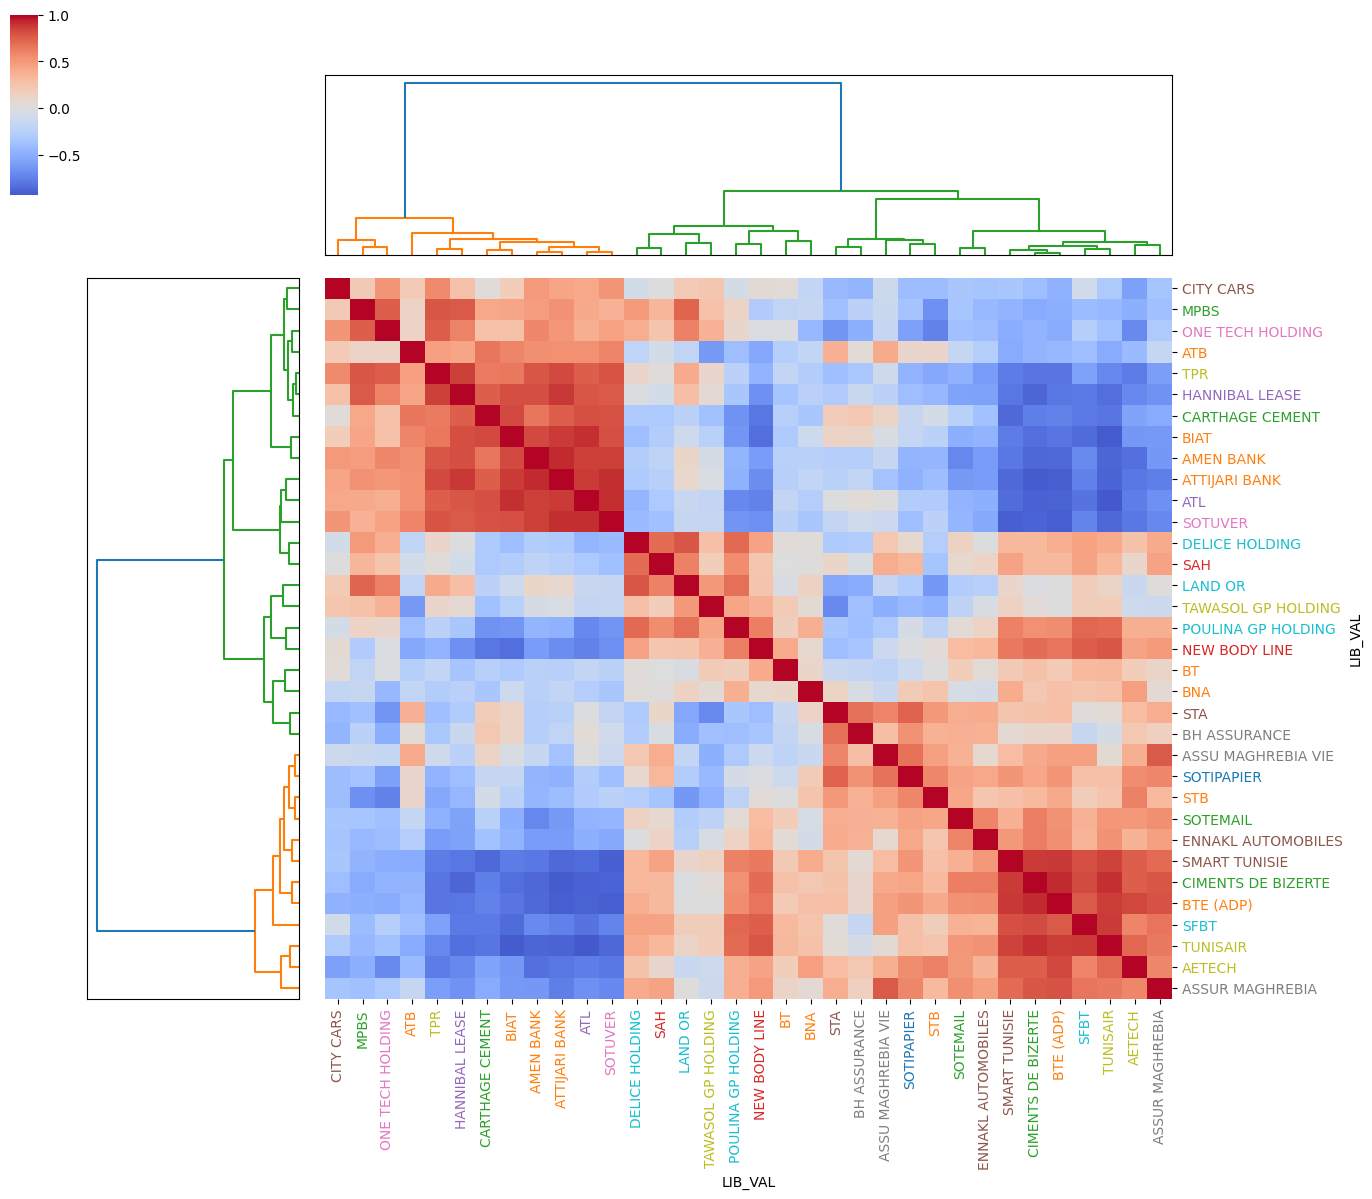

In [38]:
# Correlation for Actual portfolio
sector_dict_fixed = expand_sector_dict(sub_sector_map) 
output_path = "04-Output/01-EDA/02-Stock_Price"

plot_cluster_corr(
    corr_matrix_p,
    sector_dict=sector_dict_fixed,
    variables=Actual_portfolio,
    save_dir=output_path,
    file_name="Stock_correlation_actual_portfolio.png"
)

C:\Users\bilel\AppData\Local\Temp\ipykernel_8328\89502592.py:550: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figure saved to: 04-Output/01-EDA/02-Stock_Price\Stock_correlation_TUNINDEX.png


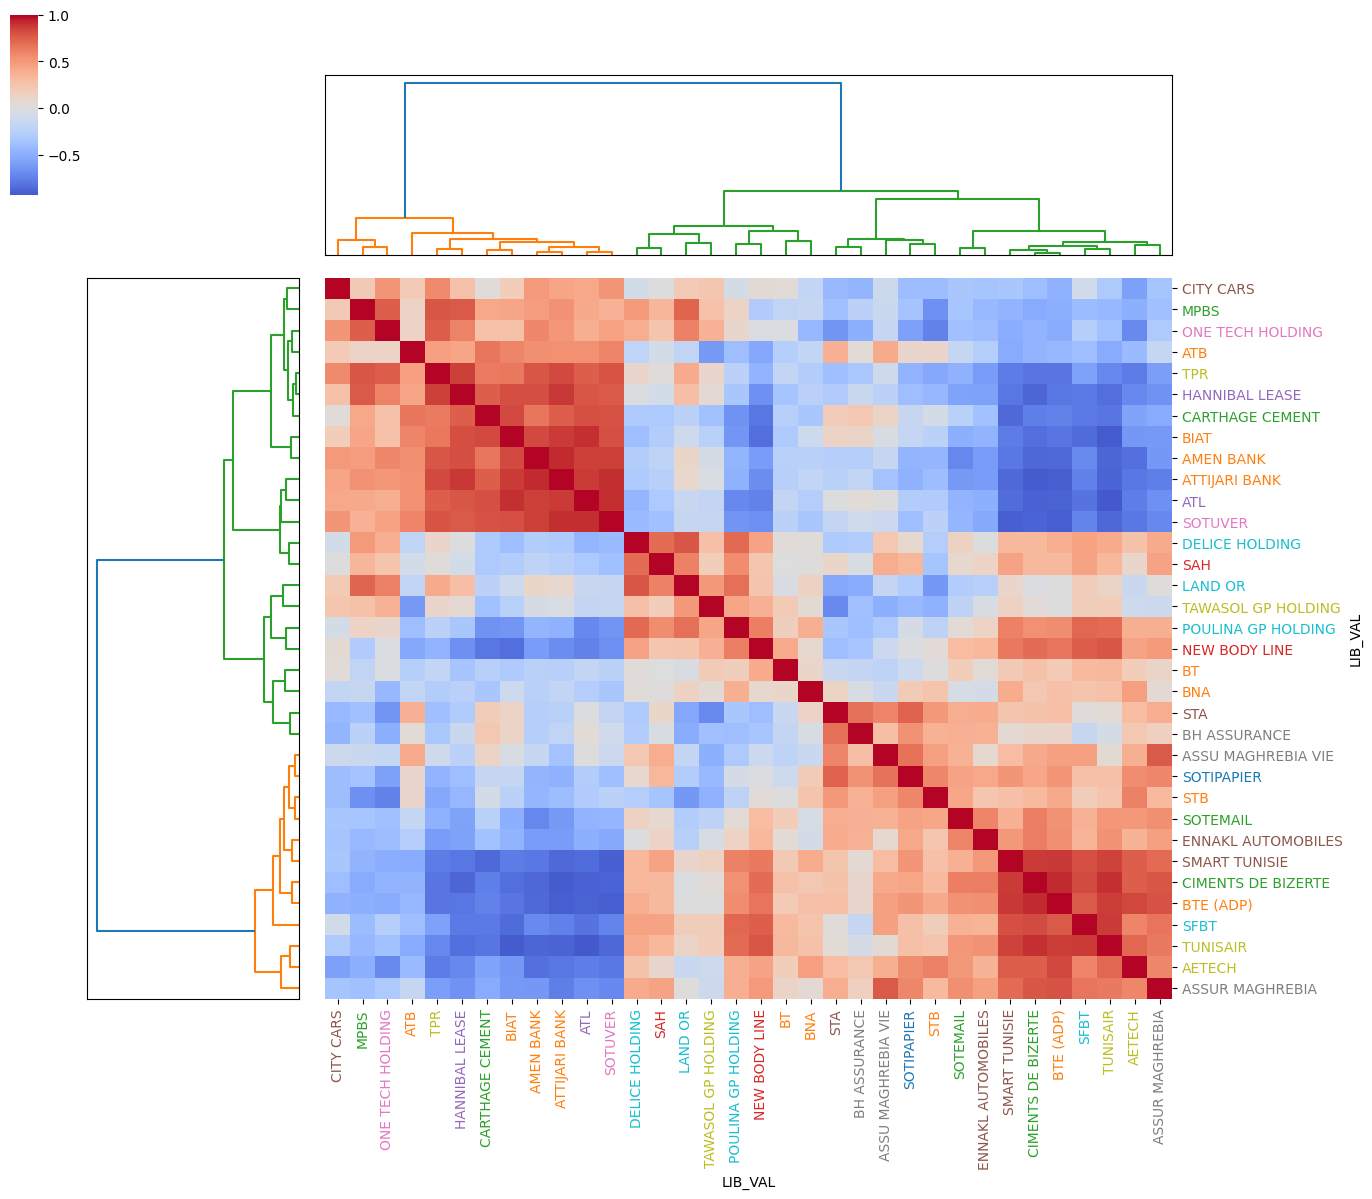

In [39]:
# Correlation for TUNINDEX
plot_cluster_corr(
    corr_matrix_p,
    sector_dict=sector_dict_fixed,
    variables=Actual_portfolio,
    save_dir=output_path,
    file_name="Stock_correlation_TUNINDEX.png"
)

C:\Users\bilel\AppData\Local\Temp\ipykernel_8328\89502592.py:550: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figure saved to: 04-Output/01-EDA/02-Stock_Price\Stock_correlation_TUNINDEX20.png


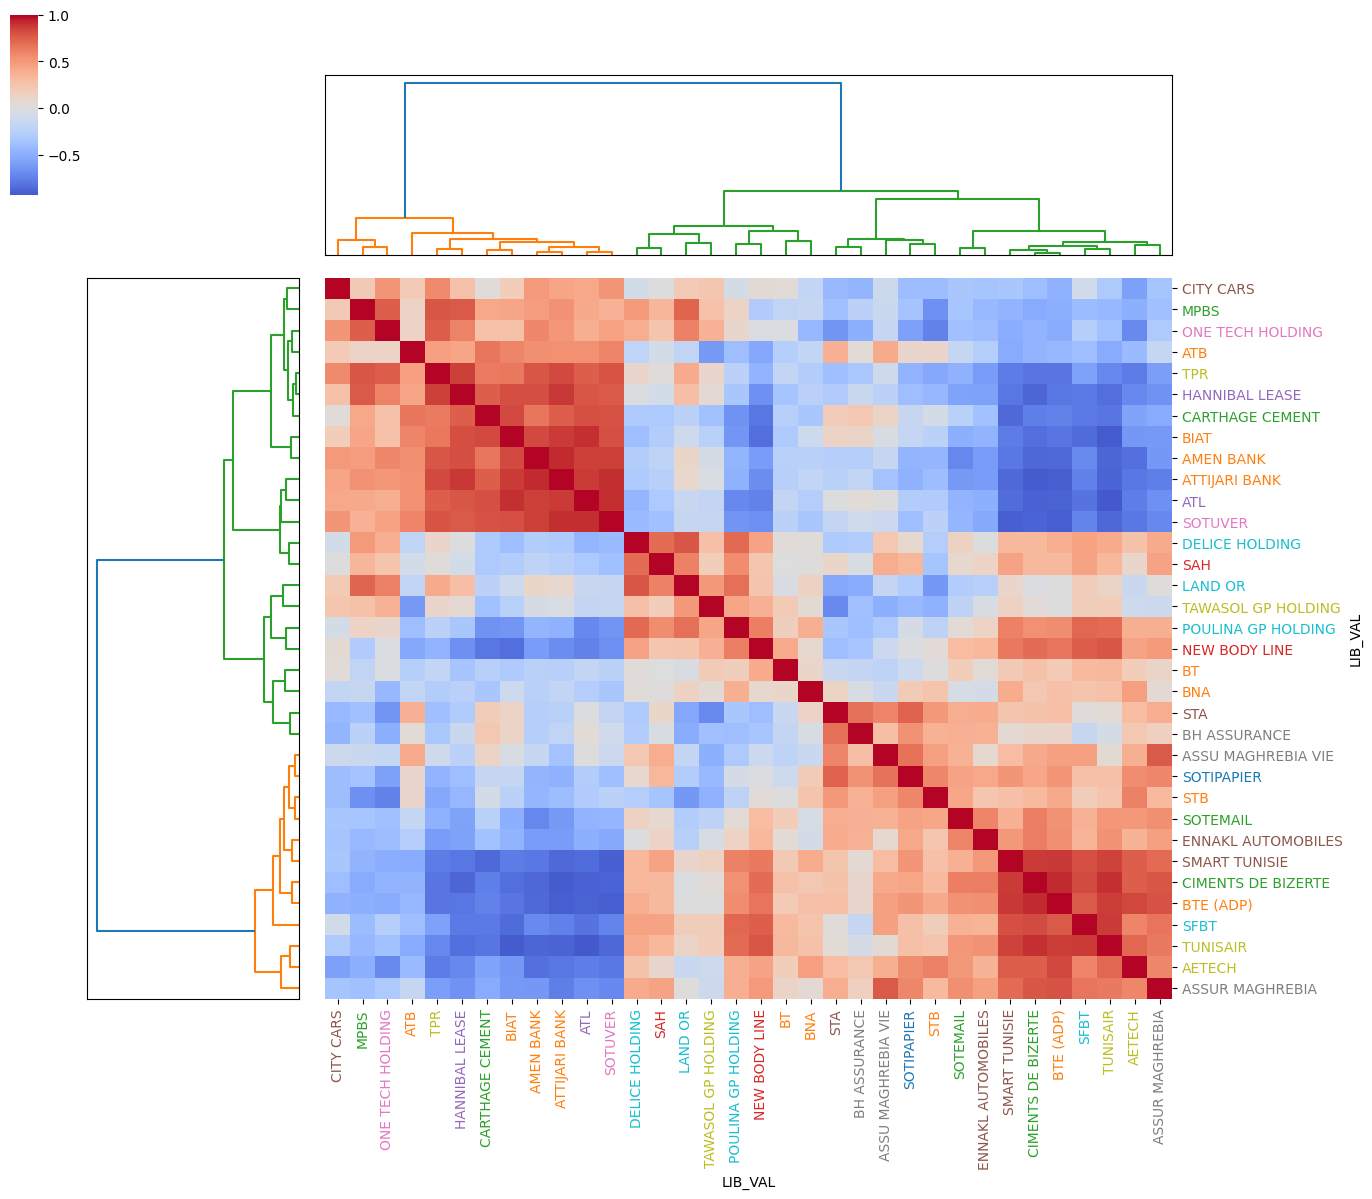

In [40]:
# Correlation for TUNINDEX 20
plot_cluster_corr(
    corr_matrix_p,
    sector_dict=sector_dict_fixed,
    variables=Actual_portfolio,
    save_dir=output_path,
    file_name="Stock_correlation_TUNINDEX20.png"
)

### Transform Log

In [41]:
# Compute Stock returns
Stock_return = compute_returns(df_pivot, 
                                 return_type="log", 
                                 freq="D",
                                 suffix="")

Stock_return_adj = compute_returns(df_price_adj, 
                                 return_type="log", 
                                 freq="D",
                                 suffix="")

In [ ]:
save_dataframes_to_excel(
    "03-Output/01-EDA/02-Stock_Price",
    {
        "returns_Stock": Stock_return,
        "returns_Stock_adj": Stock_return_adj 
    }
)

Saved → 04-Output/02-EDA\returns_Stock.xlsx
Saved → 04-Output/02-EDA\returns_Stock_adj.xlsx

Done. All DataFrames saved with index successfully.


#### Boxplot returns

C:\Users\bilel\AppData\Local\Temp\ipykernel_8272\1197925562.py:598: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(df_pivot[cols].values,


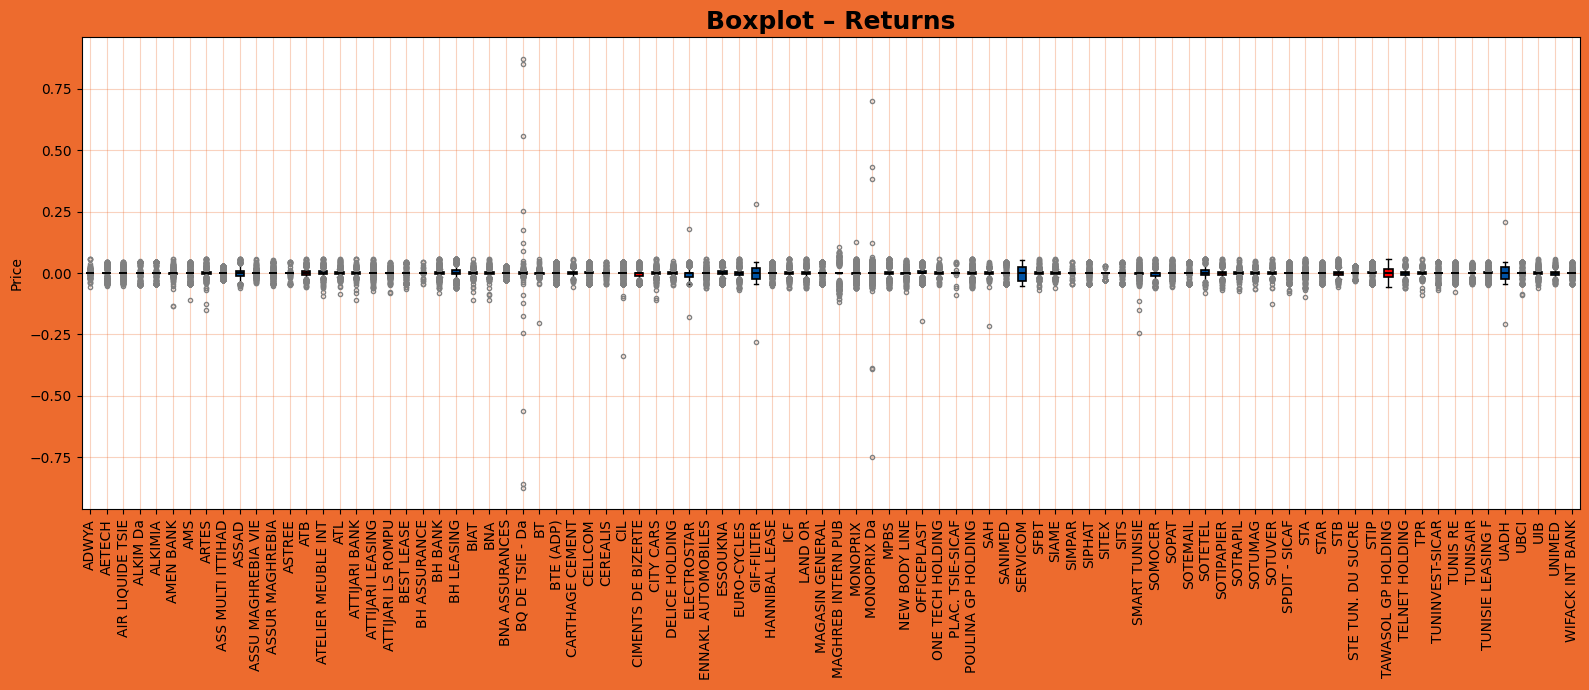

Saved: 04-Output/02-EDA/01-Stock\Returns.png


In [ ]:
output_path = "03-Output/01-EDA/02-Stock_Price"
plot_boxplot(
    Stock_return,
    folder_path=output_path,
    df_name="Returns",
    highlight_list=Actual_portfolio,
    highlight_color="red"
)

C:\Users\bilel\AppData\Local\Temp\ipykernel_8272\1197925562.py:675: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(df_pivot[cols].values,


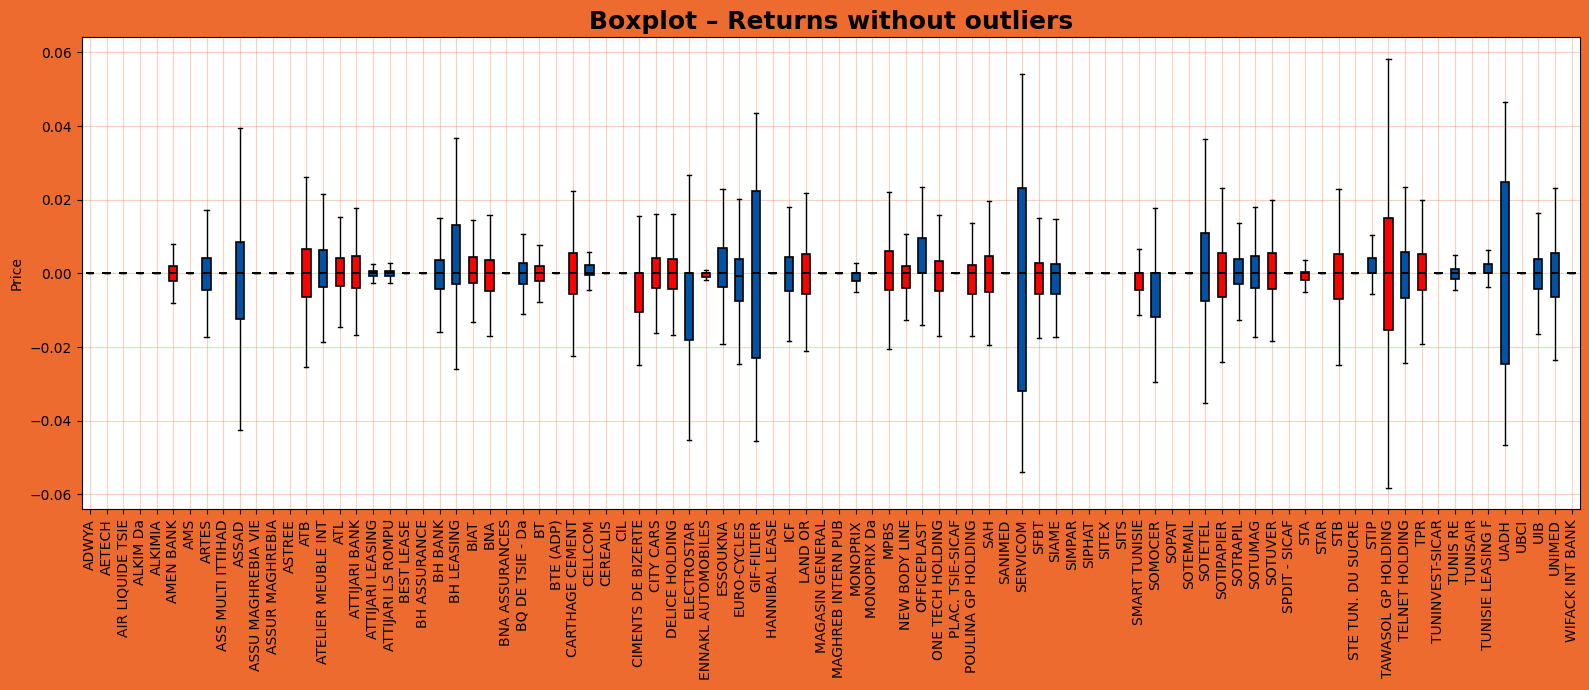

Saved: 04-Output/02-EDA/01-Stock\Returns without outliers_no_outliers.png


In [ ]:
output_path = "03-Output/01-EDA/02-Stock_Price"
plot_boxplot_no_outliers(
    Stock_return,
    folder_path=output_path,
    df_name="Returns without outliers",
    highlight_list=Actual_portfolio,
    highlight_color="red"
)

C:\Users\RMG_AMMOURI\AppData\Local\Temp\ipykernel_31716\2438177187.py:46: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



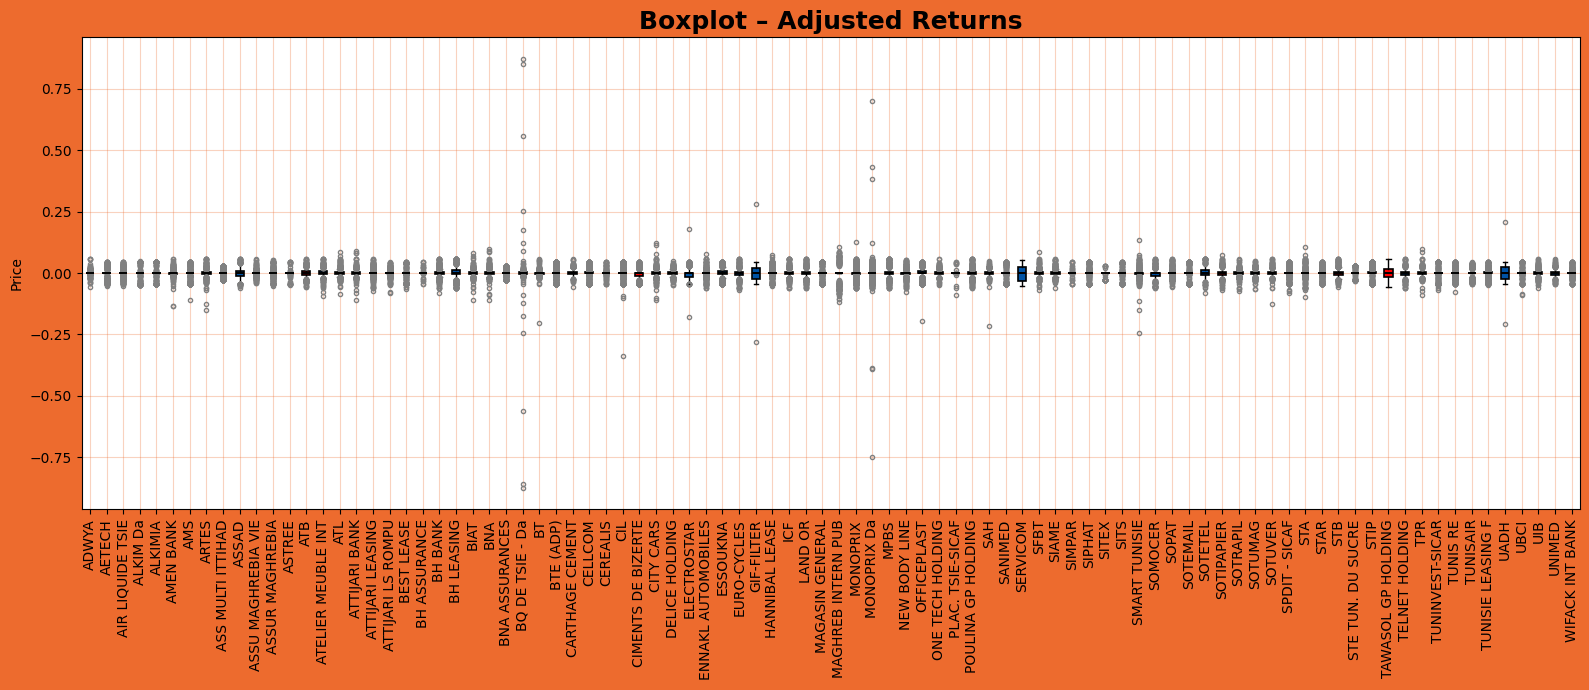

Saved: 04-Output/02-EDA/01-Stock\Adjusted Returns.png


In [ ]:
output_path = "03-Output/01-EDA/02-Stock_Price"
plot_boxplot(
    Stock_return_adj,
    folder_path=output_path,
    df_name="Adjusted Returns",
    highlight_list=Actual_portfolio,
    highlight_color="red"
)

C:\Users\bilel\AppData\Local\Temp\ipykernel_8272\1197925562.py:675: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(df_pivot[cols].values,


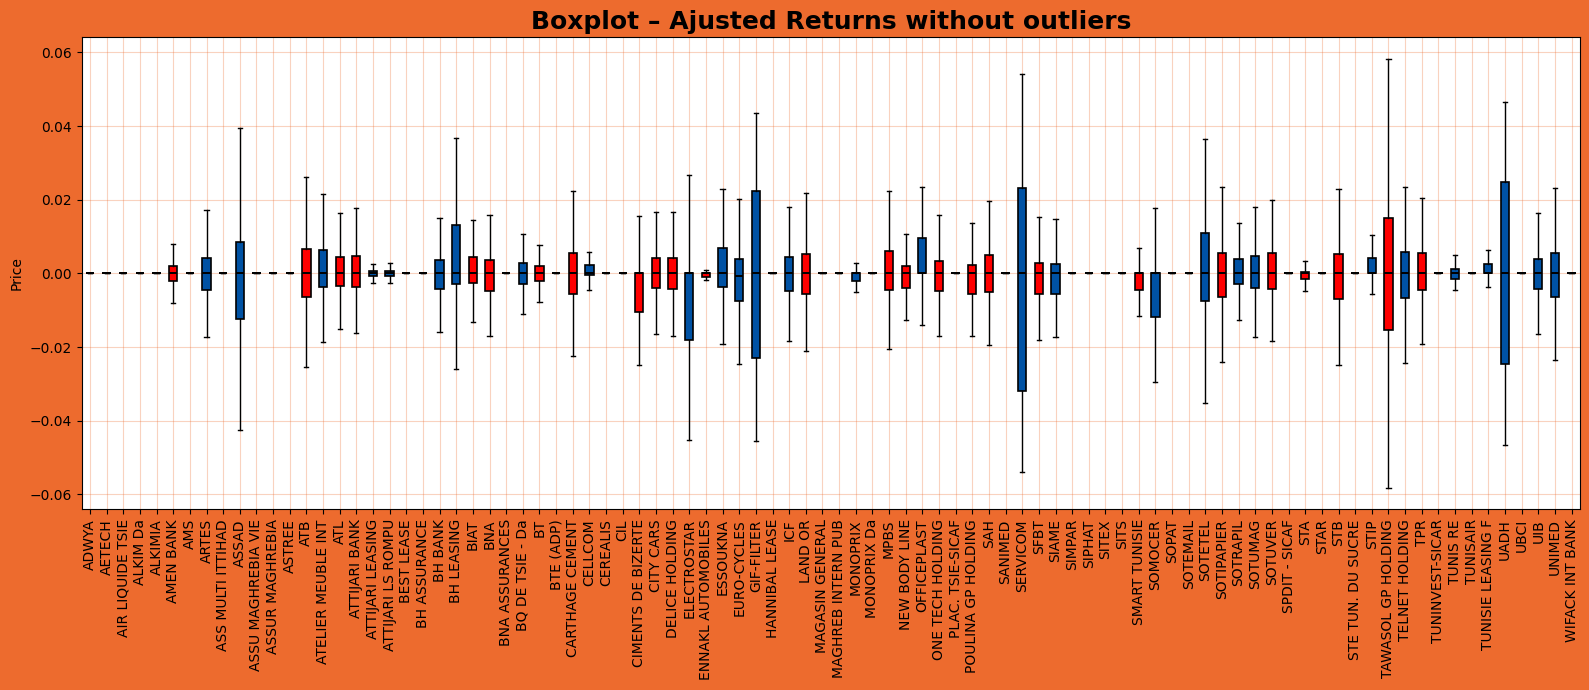

Saved: 04-Output/02-EDA/01-Stock\Ajusted Returns without outliers_no_outliers.png


In [ ]:
output_path = "03-Output/01-EDA/02-Stock_Price"
plot_boxplot_no_outliers(
    Stock_return_adj,
    folder_path=output_path,
    df_name="Ajusted Returns without outliers",
    highlight_list=Actual_portfolio,
    highlight_color="red"
)

#### Distribution Analysis of Returns

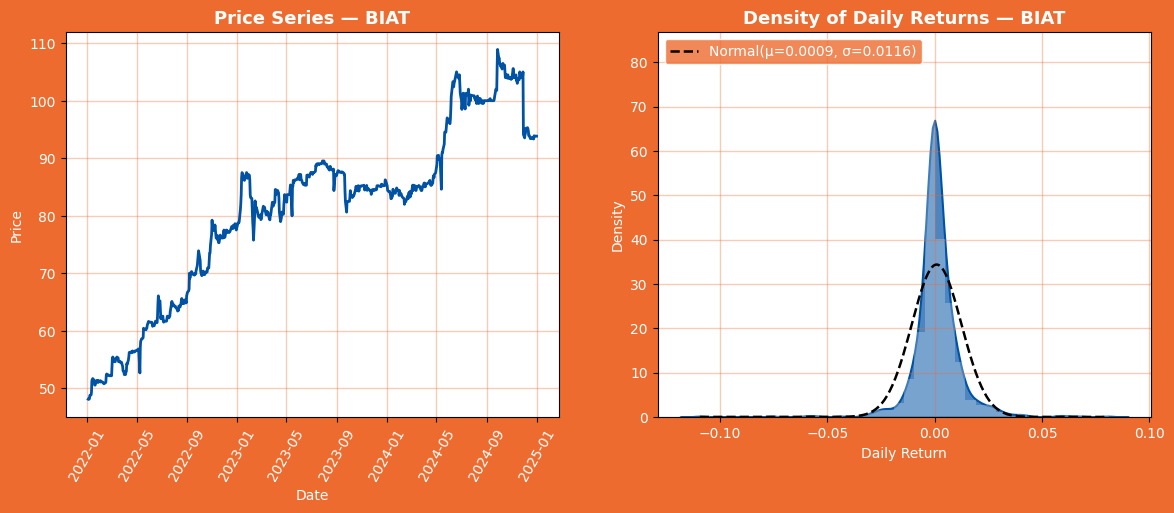

Generated 90 plots. Displayed only: BIAT


In [48]:
output_path = "03-Output/01-EDA/02-Stock_Price/03-Density_returns"
plot_stock_density(df_price_adj, Stock_return_adj,
                   save_path=output_path,
                   show_stock="BIAT"
)


#### Cumulative returns

In [49]:
# Compute cumulative returns
cum_stock_returns = compute_cumulative_returns(Stock_return)
cum_stock_returns_adj = compute_cumulative_returns(Stock_return_adj)

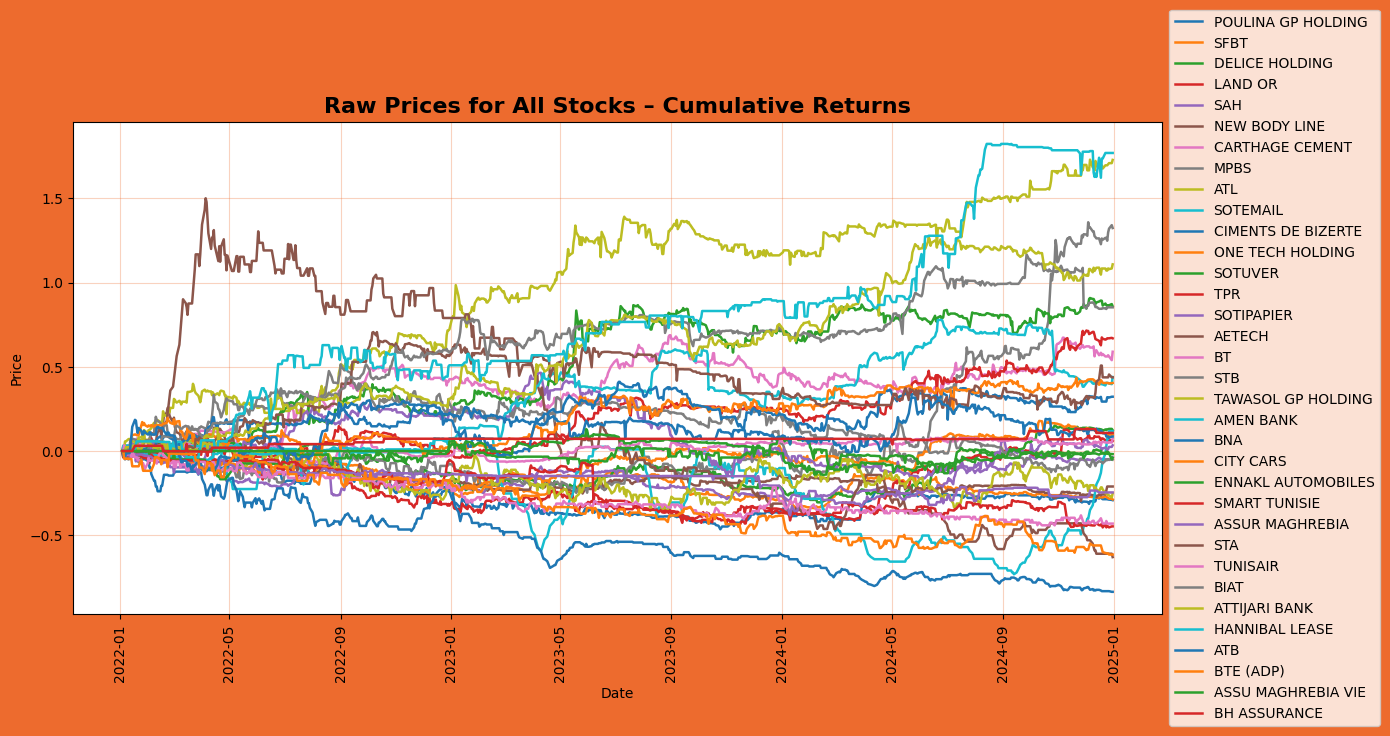

Saved: 03-Output/01-EDA/02-Stock_Price\Cumulative Returns.png


In [50]:
folder_path = "03-Output/01-EDA/02-Stock_Price"
plot_raw_all(cum_stock_returns_adj[Actual_portfolio], 
             folder_path, 
             df_name="Cumulative Returns")

In [ ]:
output_path = "03-Output/01-EDA/02-Stock_Price/02-Cum_returns"
save_raw_plots(cum_stock_returns_adj, output_path)

#### Drawdowns

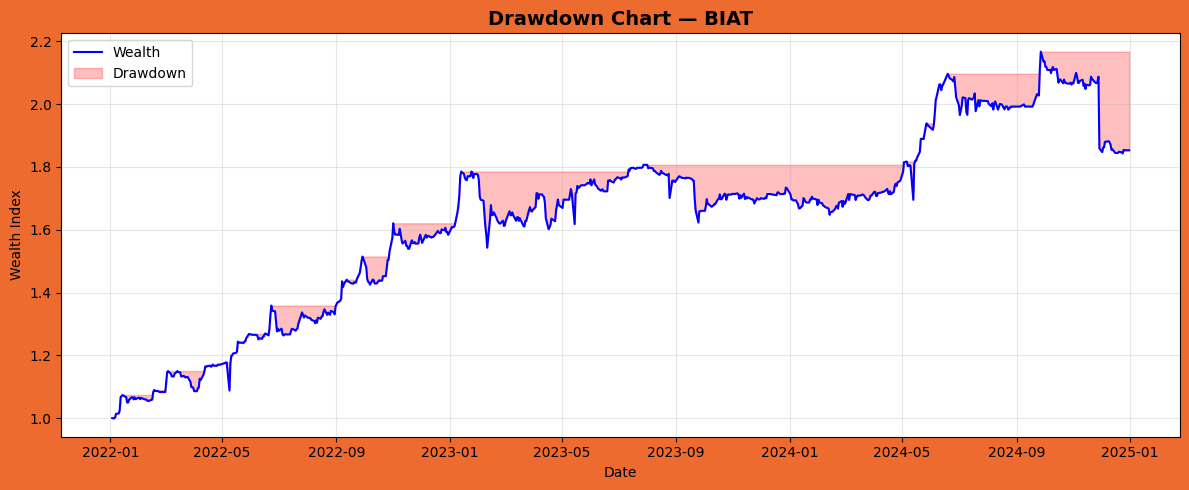

Finished saving drawdown plots → 03-Output/01-EDA/02-Stock_Price/04-drawdown_plots
Displayed plot for: BIAT


In [56]:
output_path = "03-Output/01-EDA/02-Stock_Price/04-drawdown_plots"
save_all_drawdown_plots(Stock_return_adj, 
                        output_path, 
                        show_stock="BIAT")